In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder   #FOR PREPROCESSING OF DATA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression   # FOR REGRESION MODEL IMPLEMENTATION
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor  

from sklearn.model_selection import GridSearchCV # FOR HYPERPARAMETER TUNING
from sklearn.model_selection import cross_val_score # FOR FINIDING OVERALL ACCURACY

from sklearn.metrics import r2_score # FOR FINDING THE ACCURACY OF MODEL

In [2]:
df=pd.read_csv('cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


##  1] DATA PREPROCESSING AND CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### FROM DATASET ON STEP 3 WE FIND THAT THE normalized-losses & horsepower IS OF (OBJECT) TYPE WHICH HAS TO BE IN (INTEGER) FORM

In [6]:
df['normalized-losses'].value_counts()   # consist of ?

?      41
161    11
91      8
150     7
104     6
128     6
134     6
168     5
85      5
65      5
95      5
103     5
102     5
74      5
94      5
118     4
122     4
148     4
93      4
106     4
83      3
101     3
137     3
115     3
154     3
125     3
89      2
81      2
188     2
197     2
158     2
87      2
129     2
119     2
108     2
194     2
145     2
113     2
164     2
110     2
153     2
192     2
256     1
121     1
142     1
77      1
231     1
90      1
98      1
186     1
78      1
107     1
Name: normalized-losses, dtype: int64

In [7]:
df['horsepower'].value_counts()  # consist of ?

68     19
70     11
69     10
116     9
110     8
95      7
160     6
88      6
101     6
62      6
114     6
76      5
145     5
82      5
84      5
97      5
102     5
111     4
92      4
86      4
123     4
85      3
182     3
207     3
73      3
152     3
121     3
90      3
56      2
112     2
?       2
161     2
100     2
156     2
52      2
155     2
176     2
162     2
94      2
184     2
55      1
72      1
78      1
262     1
135     1
134     1
140     1
64      1
142     1
288     1
115     1
143     1
120     1
106     1
200     1
175     1
48      1
58      1
154     1
60      1
Name: horsepower, dtype: int64

### Now handling Missing values

In [8]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)

df["normalized-losses"]=df["normalized-losses"].astype("float")
df["horsepower"]=df["horsepower"].astype("float")

nmean=df["normalized-losses"].mean()
hmean=df["horsepower"].mean()

df["normalized-losses"].fillna(nmean,inplace=True)
df["horsepower"].fillna(hmean,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


In [10]:
df["horsepower"].value_counts()

68.000000     19
70.000000     11
69.000000     10
116.000000     9
110.000000     8
95.000000      7
88.000000      6
114.000000     6
62.000000      6
160.000000     6
101.000000     6
97.000000      5
102.000000     5
82.000000      5
76.000000      5
84.000000      5
145.000000     5
86.000000      4
111.000000     4
123.000000     4
92.000000      4
207.000000     3
85.000000      3
152.000000     3
73.000000      3
182.000000     3
121.000000     3
90.000000      3
56.000000      2
155.000000     2
162.000000     2
94.000000      2
52.000000      2
104.256158     2
176.000000     2
112.000000     2
100.000000     2
161.000000     2
156.000000     2
184.000000     2
288.000000     1
140.000000     1
175.000000     1
78.000000      1
48.000000      1
134.000000     1
120.000000     1
60.000000      1
106.000000     1
142.000000     1
58.000000      1
72.000000      1
64.000000      1
135.000000     1
262.000000     1
154.000000     1
143.000000     1
55.000000      1
200.000000    

In [11]:
df["normalized-losses"].value_counts()

122.0    45
161.0    11
91.0      8
150.0     7
134.0     6
104.0     6
128.0     6
103.0     5
102.0     5
74.0      5
65.0      5
168.0     5
85.0      5
95.0      5
94.0      5
118.0     4
93.0      4
106.0     4
148.0     4
101.0     3
115.0     3
125.0     3
83.0      3
154.0     3
137.0     3
108.0     2
145.0     2
188.0     2
81.0      2
158.0     2
129.0     2
197.0     2
153.0     2
192.0     2
164.0     2
194.0     2
110.0     2
113.0     2
89.0      2
119.0     2
87.0      2
256.0     1
90.0      1
142.0     1
78.0      1
186.0     1
231.0     1
107.0     1
98.0      1
121.0     1
77.0      1
Name: normalized-losses, dtype: int64

### Now checking the outlier

<AxesSubplot:xlabel='price', ylabel='make'>

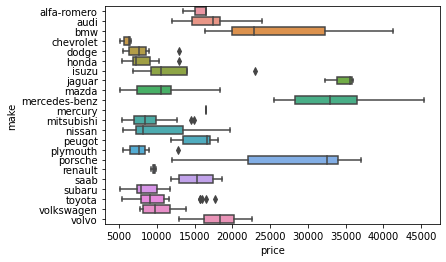

In [12]:
sns.boxplot(data=df, x='price', y='make') #having outliers

In [13]:
df[(df['make']=='isuzu') & (df['price']>20000)]  # checking the oulier
df[(df['make']=='dodge') & (df['price']>11000)]
df[(df['make']=='honda') & (df['price']>12000)]
df[(df['make']=='mitsubishi') & (df['price']>12000)]
df[(df['make']=='toyota') & (df['price']>13000)]
df[(df['make']=='plymouth') & (df['price']>11000)]

df.drop(45, inplace=True)  # droping the outliers
df.drop(29, inplace=True)
df.drop(41, inplace=True)
df.drop([82,83,84], inplace=True)
df.drop(124, inplace=True)
df.drop([172,178,179,180,181], inplace=True)

<AxesSubplot:xlabel='price', ylabel='make'>

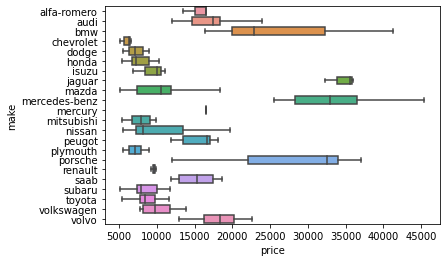

In [14]:
sns.boxplot(data=df, x='price', y='make') # without outliers

In [15]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


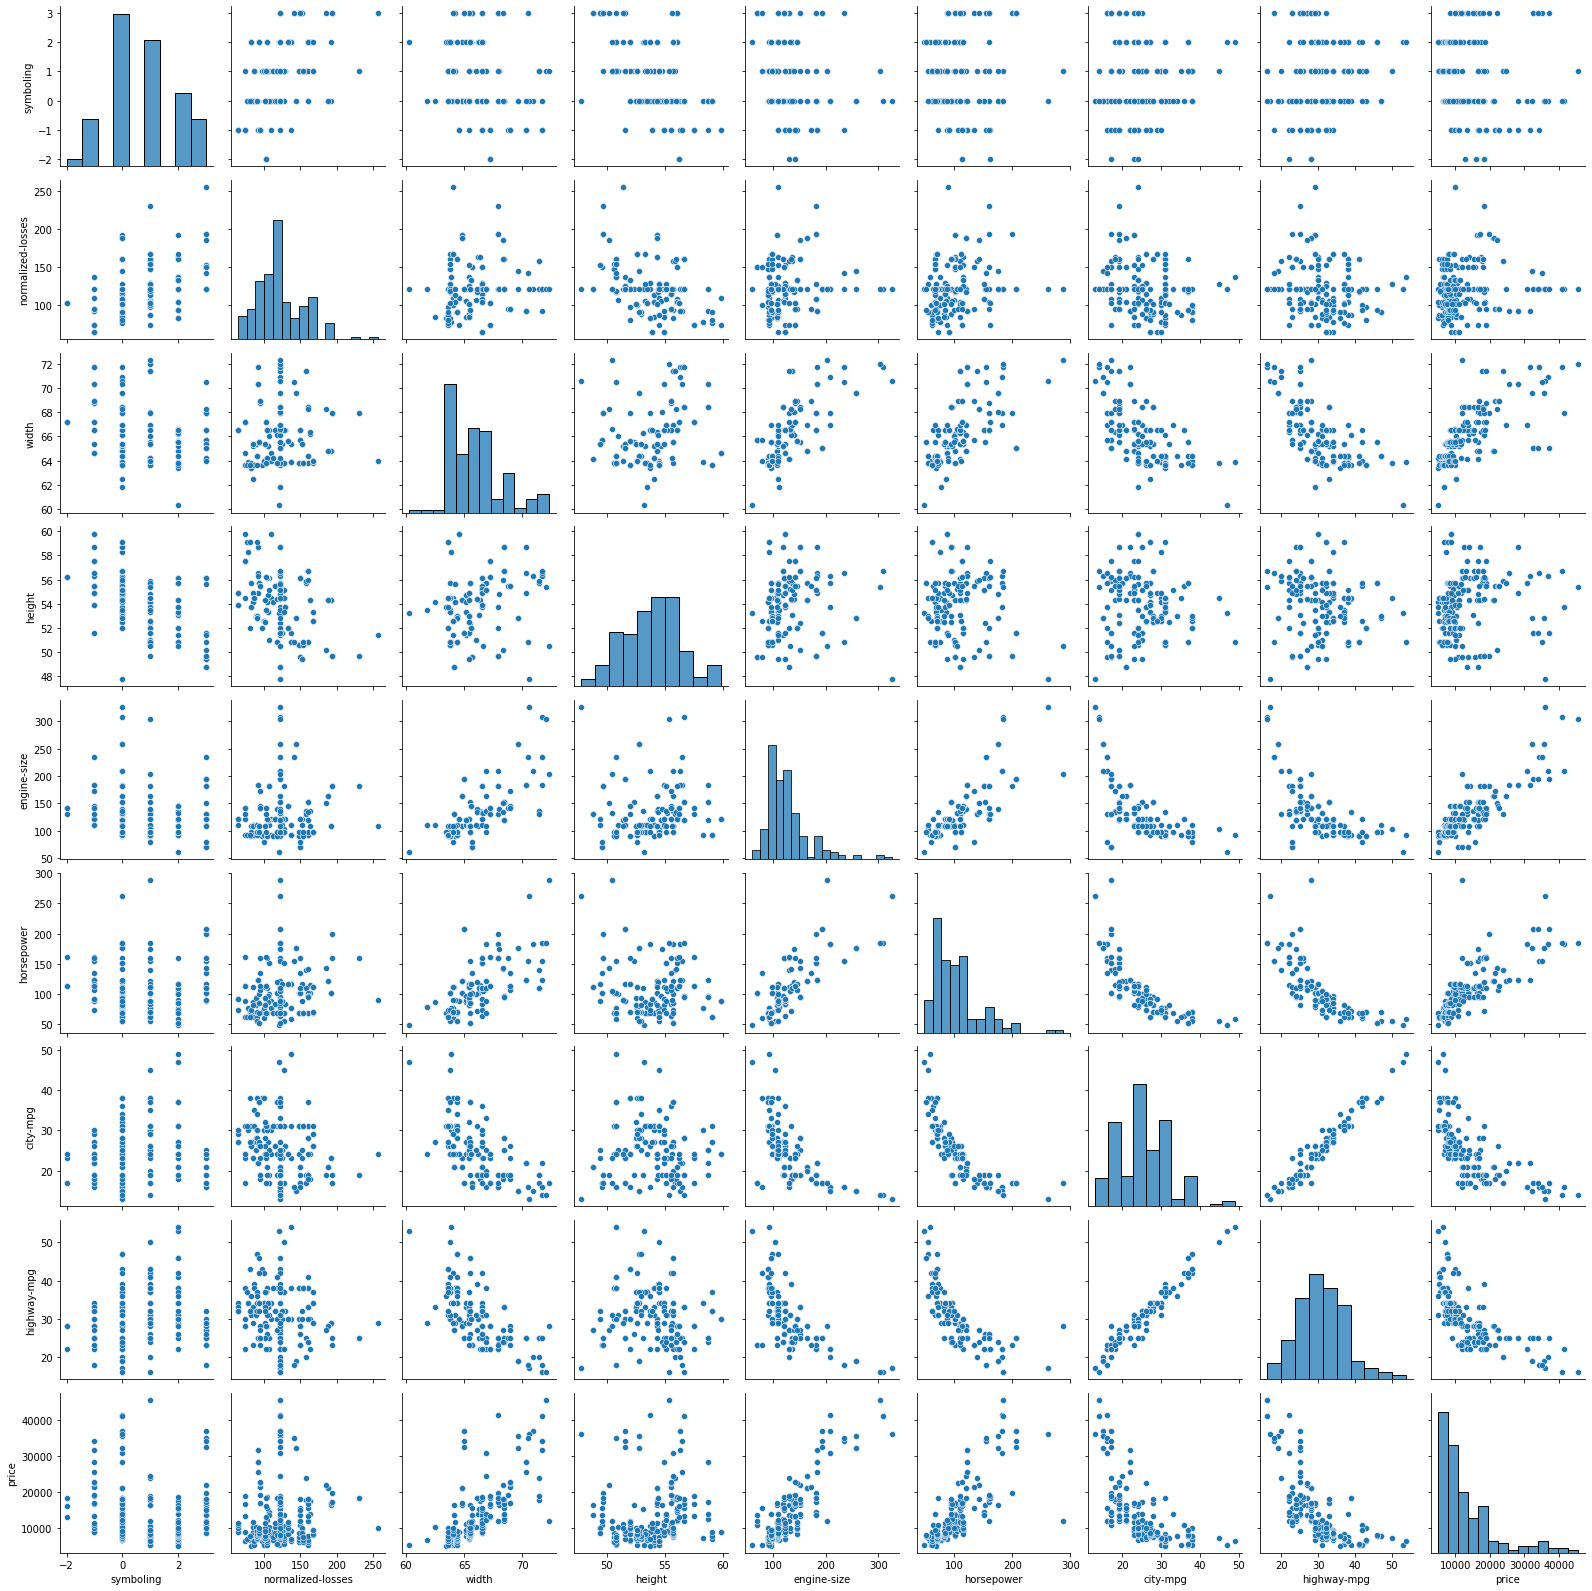

In [16]:
sns.pairplot(df) # pairplot to see distribution

## 2] VISUALISATION

###  TO FIND COUNT OF  CARMAKER IN DATA SET

<AxesSubplot:>

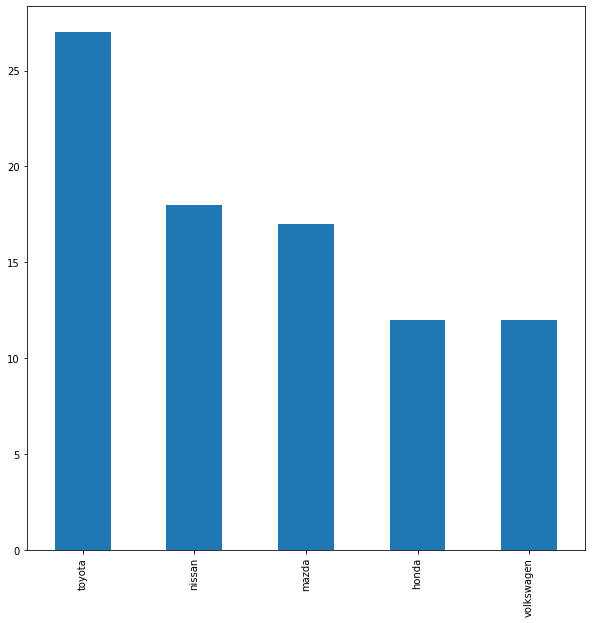

In [17]:
plt.figure(figsize=(10,10))
df.make.value_counts().nlargest(5).plot(kind="bar")  #taking only top 10 into consideration

## ENCODING

In [18]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

In [19]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [20]:
df_num

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [21]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [22]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [23]:
df # final dataset 1

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [24]:
df=pd.concat([df_cat,df_num],axis=1)

In [25]:
df # data set after encoding 2

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,3,2,0,3,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,21,1,3,2,0,3,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,21,1,3,2,0,5,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,21,0,3,2,0,3,-1,95.0,68.9,55.5,145,106.0,26,27,22470


### SCALING THE DATASET

In [26]:
for col in df:
    sc=StandardScaler()
    df[col]=sc.fit_transform(df[[col]])

In [27]:
df# dataset after scaling 3

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.019137,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.050194
1,-1.930113,0.340010,-3.112000,1.229517,-0.125656,-3.103277,1.867513,0.019137,-0.817748,-2.071007,0.107874,0.224311,-0.680796,-0.585808,0.422324
2,-1.930113,0.340010,-0.752016,1.229517,-0.125656,1.938242,0.187187,0.019137,-0.178224,-0.591990,0.631937,1.321612,-0.987075,-0.731505,0.422324
3,-1.771124,0.340010,0.427976,-0.568186,-0.125656,-0.078366,1.027350,1.356450,0.141538,0.188602,-0.392369,-0.005357,-0.221378,-0.148717,0.106540
4,-1.771124,0.340010,0.427976,-2.365889,-0.125656,-0.078366,1.027350,1.356450,0.232898,0.188602,0.250800,0.326386,-1.140215,-1.314294,0.539969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.374905,0.681608,0.369905,0.300867,-0.374517,-0.440111,0.465048
201,1.408661,0.340010,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.329225,0.681608,0.369905,1.474724,-0.987075,-0.877202,0.737489
202,1.408661,0.340010,0.427976,1.229517,-0.125656,1.938242,-1.493140,-0.840563,1.374905,0.681608,1.132180,0.811240,-1.140215,-1.168596,1.039652
203,1.408661,-2.941088,0.427976,1.229517,-0.125656,-0.078366,-1.493140,-0.840563,1.374905,0.681608,0.465190,0.096718,0.084901,-0.585808,1.161631


##  3] Model Building

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [30]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(r2_score(ytest,ypred)*100)
    
    

In [31]:
model_list=[]
model_list.append(("LinearRegression--",LinearRegression()))
model_list.append(("Decision Tree--",DecisionTreeRegressor(random_state=3)))
model_list.append(("Random Forest--",RandomForestRegressor(random_state=4)))

for name,model in model_list:
    print(name)
    mymodel(model)
    print()

LinearRegression--
74.88166774679833

Decision Tree--
77.30091426538193

Random Forest--
76.17114683533501



## 4] HYPER PARAMETER TUNING

### 1] FOR RANDOM FOREST

In [32]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [70,80, 90, 100,110],
    'max_features': [2, 3,4],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [6,8, 10, 12],
    'n_estimators': [100, 200, 300, 50]
}
rf = RandomForestRegressor()
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid.fit(x, y)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


In [ ]:
grid.best_params_

In [ ]:
model_list=[]  # hyperparamter tuning
model_list.append(("Random Forest--",RandomForestRegressor(bootstrap= True,max_depth= 90,max_features=4,min_samples_leaf= 3,min_samples_split= 6,n_estimators=50,random_state=2)))

for name,model in model_list:
    print(name)
    mymodel(model)
    print()

### 2] USING VOTING REGRESSOR

In [ ]:
models1 = [('Linreg  -:', LinearRegression()),("Random Forest--",RandomForestRegressor(bootstrap= True,max_depth= 90,max_features=4,min_samples_leaf= 3,min_samples_split= 6,n_estimators=50,random_state=5))]

In [ ]:
model_list=[]
model_list.append(('Voting Regressor',VotingRegressor(estimators = models1)))

for name,model in model_list:
    print(name)
    mymodel(model)
    print()

###  5] FINDING OVERALL ACCURACY OF MODEL

In [ ]:
cvs1 = cross_val_score(RandomForestRegressor(bootstrap= True,max_depth= 90,max_features=4,min_samples_leaf= 3,min_samples_split= 6,n_estimators=50,random_state=6), x,y, cv=4)
print(f"Average  Accuracy -: {cvs1.mean()*100} ")

### OVERALL PERFORMANCE  OF MODEL BEFORE AND AFTER TUNING

In [ ]:
#for ease in view
data = [{ "BEFORE TUNING": 76.17, "AFTER TUNING": 81.2}]
 
df = pd.DataFrame(data,index=['RandomForestRegressor'])
df

## CONCLUSION

1] By Applying 3 different model on the classification DataSet 
     Regression,Random Forest,Decision Tree
    
2] As Decision Tree give higher accuracy but after hyperparameter tuning i conclude that the accuracy decreased

3] Thus Hyper Tuning for the Decision Tree Give highest Accuracy to 81 %
     Followed by Voting Regressor  with  79.71

4]  SO overall accuracy of the model cam to 77%